**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Neha Nair
- Pranav Soma
- Satya Rajendra
- Advika Shankar
- Wasp

# Research Question

What specific factors have most contributed to novels in the 'Paperback Nonfiction' category dominating the 'New York Times Bestseller' list in the time frame from 2020 to 2023?

By dominating the 'New York Times Bestseller' list, we are referring to novels maintaining top rankings on the list for the longest number of weeks. The factors we will be exploring are the inclusion of current events in the novel, author credibility/experience (determined by whether the author has had previous 'New York Times Bestseller' books), average ratings (Goodreads), number of awards received, appearance on a celebrity book club list, and publication timing (season). Using our research, authors aiming for recognition on the 'New York Times Bestseller' list in this genre may consider certain inclusions, such as references to current events, in their work, while publishers can identify effective marketing strategies to reach a wider audience.

## Background and Prior Work


- Include a general introduction to your topic
- Include explanation of what work has been done previously
- Include citations or links to previous work

This section will present the background and context of your topic and question in a few paragraphs. Include a general introduction to your topic and then describe what information you currently know about the topic after doing your initial research. Include references to other projects who have asked similar questions or approached similar problems. Explain what others have learned in their projects.

Find some relevant prior work, and reference those sources, summarizing what each did and what they learned. Even if you think you have a totally novel question, find the most similar prior work that you can and discuss how it relates to your project.

References can be research publications, but they need not be. Blogs, GitHub repositories, company websites, etc., are all viable references if they are relevant to your project. It must be clear which information comes from which references. (2-3 paragraphs, including at least 2 references)

 **Use inline citation through HTML footnotes to specify which references support which statements** 

For example: After government genocide in the 20th century, real birds were replaced with surveillance drones designed to look just like birds.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) Use a minimum of 2 or 3 citations, but we prefer more.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) You need enough to fully explain and back up important facts. 

Note that if you click a footnote number in the paragraph above it will transport you to the proper entry in the footnotes list below.  And if you click the ^ in the footnote entry, it will return you to the place in the main text where the footnote is made.

To understand the HTML here, `<a name="#..."> </a>` is a tag that allows you produce a named reference for a given location.  Markdown has the construciton `[text with hyperlink](#named reference)` that will produce a clickable link that transports you the named reference.

1. <a name="cite_note-1"></a> [^](#cite_ref-1) Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.


# Hypothesis


Our null hypothesis is that none of the factors (inclusion of current events, author credibility, average ratings, number of awards received, appearance on a celebrity book club list, or publication timing/season) significantly influence a novel's likelihood of dominating the 'New York Times Bestseller' list for the 'Paperback Nonfiction' category in the time frame from 2020 to 2023.
Our alternative hypothesis is that at least one of the factors significantly influences a novel's likelihood of dominating the 'New York Times Bestseller' list for the 'Paperback Nonfiction' category in the time frame from 2020 to 2023. We will be using a significance level (alpha) of 0.05, as this has been conventionally accepted as the threshold to discriminate significant from non-significant results in statistical testing.

In particular, we think that the inclusion of current events most significantly impacts a paperback nonfiction book's likelihood of maintaining a top position on the 'New York Times Bestseller' list.
We believe that people are more likely to read nonfiction novels that relate to or are concerning current events, especially during pivotal moments in history, such as during election seasons.
Since our data set includes a presidential election year, 2020, we think this factor would strongly impact the likelihood of a nonfiction novel gaining popularity and becoming a 'New York Times Bestseller' from 2020 to 2023.
Essentially, we are assuming that people who aren't regular nonfiction readers would typically only become interested in this genre when seeking to increase their awareness of current events.

# Data

## Data overview
- Dataset #1 
  - Dataset Name: Characteristics of 'New York Times Bestsellers' in 'Paperback Nonfiction' Category 
  - Link to the dataset: Bookinfo.csv (assembled by our group, file added to repo)  
  - Number of observations: 3135
  - Number of variables: 13

For our curated dataset, we have 12 main variables: book title, author, publisher, year on list, rank on list, max # of weeks on list, whether book contents pertained to current issues, # of awards, publication season, appearance on a celebrity book club list, # of previous bestseller books by the same author, and average rating on Goodreads. We also have one additional variable, # of weeks on list, which was included to help generate data for the max # of weeks on list variable.   

The book title, author, and publisher data is in a string/object format, while the year on list and rank on list data is in an int format. The data pertaining to these five variables was pulled from _The New York Times_ website using HTTP Requests from the NYT Books API, and we specifically looked at the weekly lists published for the 'Paperback Nonfiction' category from January 5, 2020 to December 31, 2023.

For the current context variable, we looked at book summaries on goodreads and determined if the book discussed current cultural, political, or any other type of issue versus if it was timeless or historical. The datatype is either 'Yes' if the book does have current context or 'No' if it does not.

For the author to bestsellers and contiguous stretches on the bestselling lists for each unique title, we called HTTP Requests from the NYT Books API, and converted the data into CSV palatable for usage. The data we have, being the unique titles and author names are Strings, whereas the counts for both the number of publications and the number of contiguous weeks on the list are int datatypes.

For the appearance on a celebrity book club list variable, we iterated through Bookinfo.csv to check whether each book had appeared on a celebrity's book club list. Specifically we were checking appearances in Reese Witherspoon and Oprah Winfrey's book club lists. The data is stored as a column of booleans corresponding to each title on the Bestseller list.

For the goodreads info, we first obtained all the unique titles in the Bookinfo.csv. Then, we iterated through them using a web scraper to obtain the publication date/season, the number of awards recieved, and the aggregated rating of the book. 

Below is a collection of links from which we pulled our data:
- Book Title (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Author (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Publisher (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Year on Bestseller List (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Rank on Bestseller List (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Number of weeks on Bestseller List (https://www.nytimes.com/books/best-sellers/2020/01/05/paperback-nonfiction/)
- Whether book contents pertained to current issues (https://www.goodreads.com/)
- Number of awards (https://www.goodreads.com/)
- Publication season (https://www.goodreads.com/)
- Appearance on a celebrity book club list (https://www.booklistqueen.com/oprah-winfrey-books/, https://reesesbookclub.com/article/4eRlfCOXueqPrm6ZnQpzwl)
- Number of previous bestseller books by the author (https://www.goodreads.com/)
- Average rating on Goodreads (https://www.goodreads.com/)

## Characteristics of 'New York Times Bestsellers' in 'Paperback Nonfiction' Category

In [ ]:
#Data wrangling using NYT Books API
import requests
from datetime import datetime, timedelta
import time
import csv

API_KEY = "0JOvNKsVH7A0zMtTDqPn3G7pcEB90mRI"
BASE_URL = "https://api.nytimes.com/svc/books/v3/lists"

def generate_weekly_dates(start_date, end_date):
    dates = []
    current_date = start_date
    while current_date <= end_date:
        dates.append(current_date)
        current_date += timedelta(days=7)
    return dates

def get_weekly_lists_and_save_to_csv(start_date, end_date, output_csv_file):
    weekly_dates = generate_weekly_dates(start_date, end_date)
    
    # Open CSV file for writing
    with open(output_csv_file, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        
        # Write header row with the new "Publisher" field
        writer.writerow(["Date", "Title", "Author", "Rank", "Publisher", "Weeks on List"])
        
        # Loop through weekly dates and fetch data
        for date in weekly_dates:
            date_str = date.strftime("%Y-%m-%d")
            url = f"{BASE_URL}/{date_str}/paperback-nonfiction.json?api-key={API_KEY}"
            
            try:
                response = requests.get(url)
                if response.status_code == 200:
                    data = response.json()
                    books = data["results"]["books"]
                    
                    # Write book details to CSV file
                    for book in books:
                        writer.writerow([
                            data["results"]["bestsellers_date"],
                            book["title"],
                            book["author"],
                            book["rank"],
                            book["publisher"],
                            book["weeks_on_list"]
                        ])
                    print(f"Successfully saved data for {date_str}")
                else:
                    print(f"Error on {date_str}: {response.status_code} - {response.text}")
            except Exception as e:
                print(f"An error occurred for {date_str}: {e}")
            time.sleep(12)

start_date = datetime(2020, 1, 5)
end_date = datetime(2023, 12, 31)

# Call the function and save data
output_csv_file = "NYTInfo_Revised.csv"
get_weekly_lists_and_save_to_csv(start_date, end_date, output_csv_file)

In [6]:
#Data wrangling for 'max # of weeks on list' variable
authors = {}
titles = {}


for index, row in df.iterrows():
    title = row['Title']
    author = row['Author']
    weeks_on_list = row['Weeks on List']
    if author in authors:
        authors[author] += 1
    else:
        authors[author] = 1

    if title in titles:
        if int(weeks_on_list) > titles[title]:
            titles[title] = weeks_on_list
    else:
        titles[title] = weeks_on_list

df['Max Weeks on List'] = df['Title'].map(titles)
df['# of Author Bestsellers'] = df['Author'].map(authors)

df.to_csv('NYTinfo_processed.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv("Bookinfo.csv")
df #final dataset

,Year on List,Title,Author,Rank,Publisher,Weeks on List,On a Celebrity Reading List,Current Context,Max Weeks on List,# of Author Bestsellers,Rating,Awards Count,Publication Season
0,2020,I HEARD YOU PAINT HOUSES,Charles Brandt,1,Steerforth,8,False,No,11,4,4.12,0.0,Summer
1,2020,NO ONE IS TOO SMALL TO MAKE A DIFFERENCE,Greta Thunberg,2,Penguin,6,False,Yes,18,13,3.86,1.0,Fall
2,2020,SAPIENS,Yuval Noah Harari,3,Harper Perennial,84,False,Yes,208,128,4.35,2.0,Spring
3,2020,JUST MERCY,Bryan Stevenson,4,Spiegel & Grau,184,False,Yes,309,126,4.63,8.0,Summer
4,2020,BORN A CRIME,Trevor Noah,5,Spiegel & Grau,45,False,Yes,209,165,4.49,6.0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,2023,CRYING IN H MART,Michelle Zauner,11,Vintage,38,False,Yes,38,38,4.26,3.0,Spring
3131,2023,AN IMMENSE WORLD,Ed Yong,12,Random House,13,False,No,13,13,4.47,8.0,Summer
3132,2023,ALL ABOUT LOVE,bell hooks,13,Morrow,106,False,Yes,106,106,4.04,1.0,Spring
3133,2023,THE REVOLUTIONARY,Stacy Schiff,14,Back Bay,8,False,Yes,8,8,3.74,2.0,Fall


# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Average Ranking of Books on Celebrity Booklist

The plot below shows the average NYT Bestseller List ranking from 2020-2023 of every book that has appeared on a celebrity booklist.

Text(0, 0.5, 'Average Ranking')

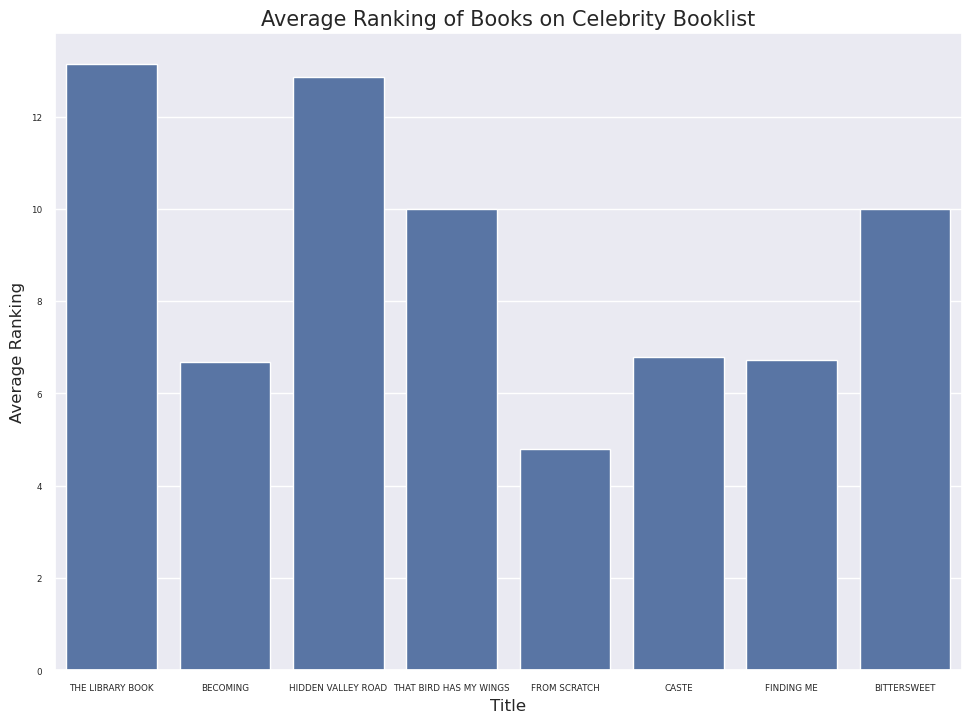

In [59]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Bookinfo.csv')
titles_on_booklist = df.loc[df['On a Celebrity Reading List'] == True]['Title'].unique().tolist()
avg_score = []
for title in titles_on_booklist:
    x = df.loc[df['Title'] == title]['Rank'].tolist()
    avg_score.append(sum(x) / len(x))
d = {'title': titles_on_booklist, 'avg_rank': avg_score}
df2 = pd.DataFrame(data=d)

sns.set_theme(rc={'figure.figsize':(11.7,8.27)}, font_scale=0.575)
sns.barplot(data=df2, x='title', y='avg_rank')
plt.title('Average Ranking of Books on Celebrity Booklist', fontdict={'size': 15})
plt.xlabel('Title', fontdict={'size': 12})
plt.ylabel('Average Ranking', fontdict={'size': 12})

### Number of Weeks on NYT Bestseller List for Books on Celebrity Booklist

The plot below shows how many weeks each book appearing on a celebrity booklist has been on the NYT Bestseller List. 

Text(0, 0.5, '# of Weeks on NYT Bestseller List')

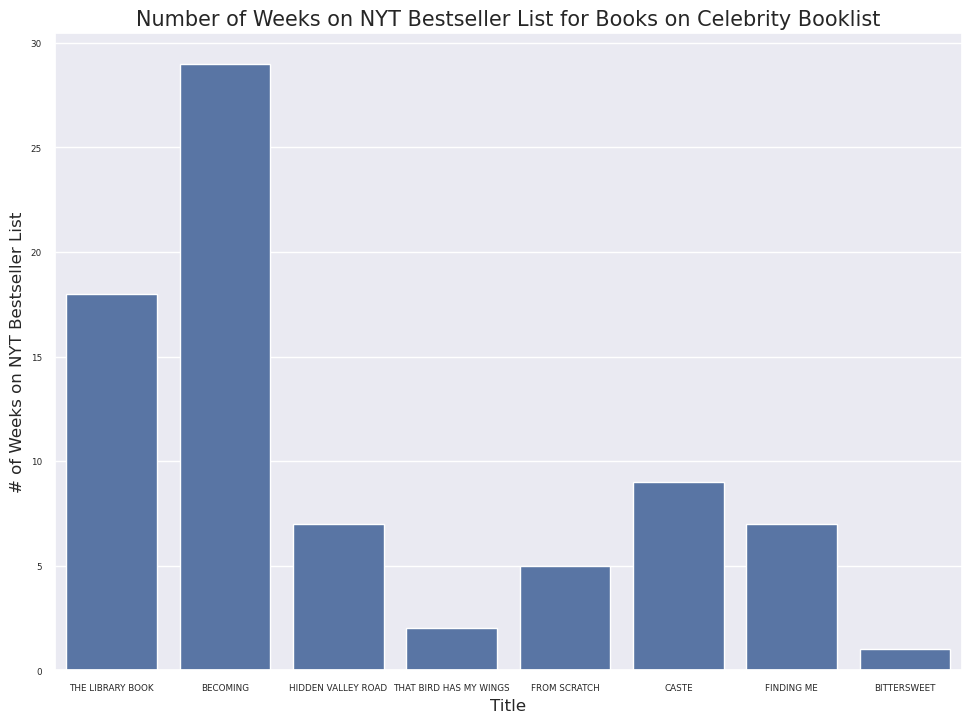

In [62]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Bookinfo.csv')
titles_on_booklist = df.loc[df['On a Celebrity Reading List'] == True]['Title'].unique().tolist()
weeks_on_nyt = []
for title in titles_on_booklist:
    x = df.loc[df['Title'] == title]['Max Weeks on List'].tolist()
    weeks_on_nyt.append(sum(x) / len(x))
d = {'title': titles_on_booklist, 'weeks': weeks_on_nyt}
df2 = pd.DataFrame(data=d)

sns.set_theme(rc={'figure.figsize':(11.7,8.27)}, font_scale=0.575)
sns.barplot(data=df2, x='title', y='weeks')
plt.title('Number of Weeks on NYT Bestseller List for Books on Celebrity Booklist', fontdict={'size': 15})
plt.xlabel('Title', fontdict={'size': 12})
plt.ylabel('# of Weeks on NYT Bestseller List', fontdict={'size': 12})

### Rating of Book on Good Reads

The first scatter plot visualizes the relationship between the average New York Times rank (lower is better) and ratings of books.

The second visualizes the Highest Rank overall vs the Max weeks on the list and is colored by the rating of the books.

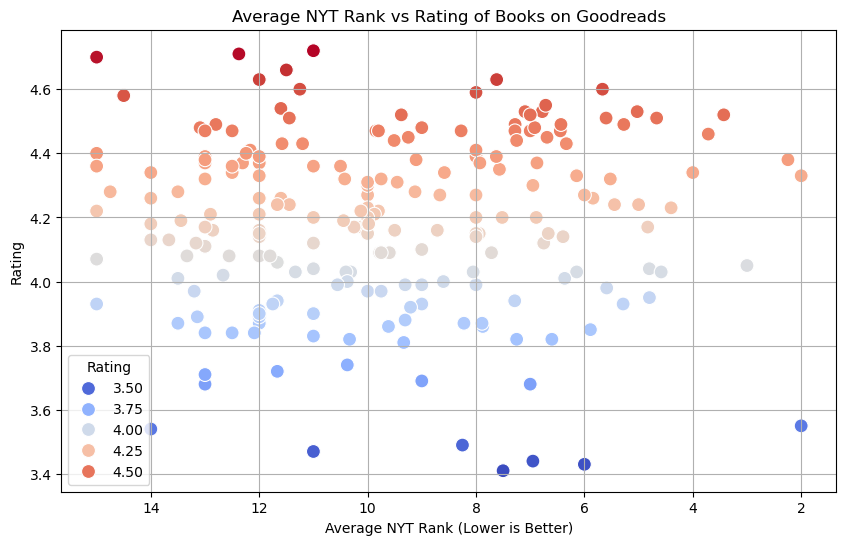

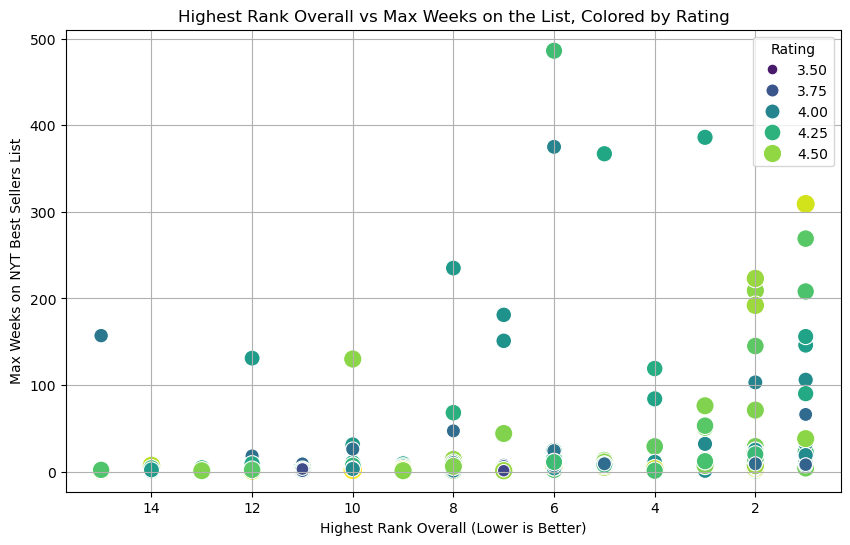

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create new dataframe with Title, Avg_rank, and Rating
df = pd.read_csv('Bookinfo.csv')
avg_rank = df.groupby('Title')['Rank'].mean().reset_index()
avg_rank.rename(columns={'Rank': 'Avg_rank'}, inplace=True)
ratings = df[['Title', 'Rating']].drop_duplicates()
rank_df = avg_rank.merge(ratings, on='Title')
rank_df

# Scatter plot of Avg_rank vs Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rank_df, x='Avg_rank', y='Rating', hue='Rating', palette='coolwarm', s=100)
# Add labels and title
plt.title('Average NYT Rank vs Rating of Books on Goodreads')
plt.xlabel('Average NYT Rank (Lower is Better)')
plt.ylabel('Rating')
plt.gca().invert_xaxis()  
plt.grid(True)


# Create new dataframe with Title, Max Rank, Max Weeks on List, and Rating
highest_rank = df.groupby('Title')['Rank'].min().reset_index()
highest_rank.rename(columns={'Rank': 'Max Rank'}, inplace=True)
max_weeks = df[['Title', 'Max Weeks on List']].drop_duplicates()
ratings = df[['Title', 'Rating']].drop_duplicates()
comparison_df = highest_rank.merge(max_weeks, on='Title').merge(ratings, on='Title')

# Scatter plot Max Rank vs Max Weeks on the List, colored by Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_df,
    x='Max Rank',  
    y='Max Weeks on List',  
    hue='Rating',  
    palette='viridis',
    size='Rating', 
    sizes=(50, 200),  
    marker='o'
)
plt.title('Highest Rank Overall vs Max Weeks on the List, Colored by Rating')
plt.xlabel('Highest Rank Overall (Lower is Better)')
plt.ylabel('Max Weeks on NYT Best Sellers List')
plt.gca().invert_xaxis()  
plt.grid(True)




### Number of Awards Won

The first scatter plot shows the relationship between the number of awards a book has won and its average NYT rank, with lower ranks (indicating better performance) positioned higher on the plot.

The second visualizes the Highest Rank overall vs the Max weeks on the list and is colored by the number of awards a book won.

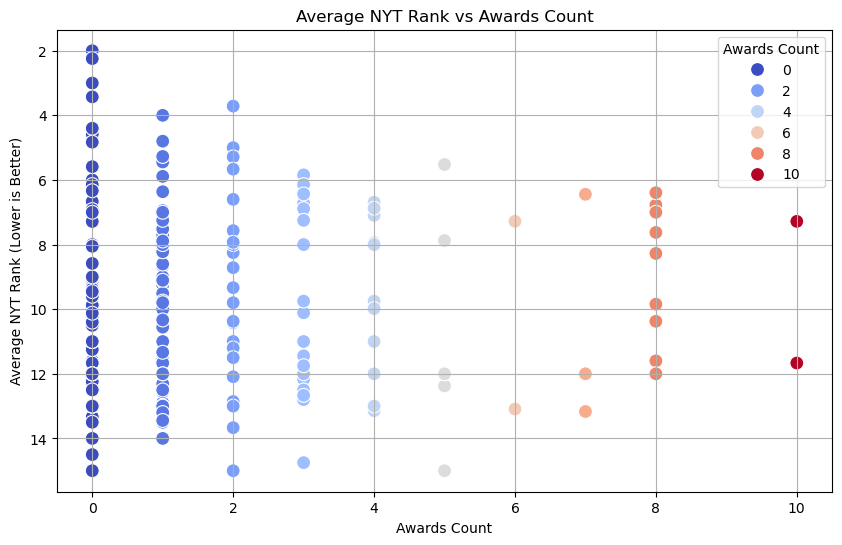

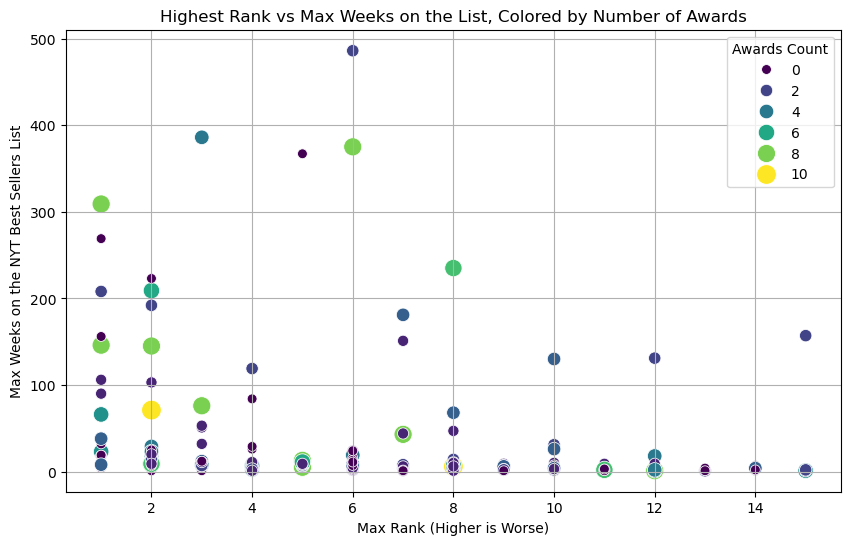

In [35]:
# Create new dataframe with Title, Avg_rank, and Awards Count
df = pd.read_csv('Bookinfo.csv')
avg_rank = df.groupby('Title')['Rank'].mean().reset_index()
avg_rank.rename(columns={'Rank': 'Avg_rank'}, inplace=True)
awards = df[['Title', 'Awards Count']].drop_duplicates()
awards_df = avg_rank.merge(awards, on='Title')
awards_df
# Plot Avg_rank vs Awards Count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=awards_df,
    x='Awards Count',
    y='Avg_rank',
    hue='Awards Count',
    palette='coolwarm',
    s=100
)
plt.title('Average NYT Rank vs Awards Count')
plt.xlabel('Awards Count')
plt.ylabel('Average NYT Rank (Lower is Better)')
plt.gca().invert_yaxis()  
plt.grid(True)

#Create new df with Title, Max Rank, Max Weeks on List, and Awards Count
highest_rank = df.groupby('Title')['Rank'].min().reset_index()
highest_rank.rename(columns={'Rank': 'Max Rank'}, inplace=True)
max_weeks = df[['Title', 'Max Weeks on List']].drop_duplicates()
awards = df[['Title', 'Awards Count']].drop_duplicates()
comparison_df2 = highest_rank.merge(max_weeks, on='Title').merge(awards, on='Title')

# Plot Max Rank vs Max Weeks on List, colored by Awards Count
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=comparison_df2,
    x='Max Rank', 
    y='Max Weeks on List',  
    hue='Awards Count', 
    palette='viridis',  
    size='Awards Count',  
    sizes=(50, 200),  
    marker='o'
)
plt.title('Highest Rank vs Max Weeks on the List, Colored by Number of Awards')
plt.xlabel('Max Rank (Higher is Worse)')
plt.ylabel('Max Weeks on the NYT Best Sellers List')
plt.grid(True)


### Random Forest Model (Avg. Rank vs. Publication Factors)

This model investigates the relationship between the different factors we are investigating and the avg rank of each unique novel on the NYT Bestseller List from 2020-2023. 

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

df_copy = df.copy()
df_copy['Current Context'] = df_copy['Current Context'].replace({'Yes': 1, 'No':0})
df_copy['On a Celebrity Reading List'] = df_copy['On a Celebrity Reading List'].replace({False:0, True:1})
avg_ranks = df_copy.groupby('Title')['Rank'].mean()
avg_ranks_df = avg_ranks.reset_index()
avg_ranks_df.columns = ['Title','Average Rank']
df_copy = pd.merge(df_copy, avg_ranks_df, on='Title', how='left')
#df_copy.drop(columns=['Average Rank_x', 'Average Rank_y'], inplace=True)

/tmp/ipykernel_3492/1185753908.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['Current Context'] = df_copy['Current Context'].replace({'Yes': 1, 'No':0})
/tmp/ipykernel_3492/1185753908.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy['On a Celebrity Reading List'] = df_copy['On a Celebrity Reading List'].replace({False:0, True:1})


Prior to using the Random Forest algorithm to determine which variable (current context, inclusion on a celebrity reading list, awards count, rating, or # of author's previous bestsellers) was most influential in determining the average rank of a novel on the 'New York Times Bestseller' list, we needed to replace the columns in the dataframe with non-numeric values to integer values. In particular, the 'Yes' values in the 'Current Context' column were replaced by the integer value '1' while the 'No' values in the 'Current Context' column were replaced by the integer value '0.' Similarly, the 'True' values in the 'On a Celebrity Reading List' column were replaced by the integer value '1' while the 'False' values in the 'On a Celebrity Reading List' column were replaced by the integer value '0.' The average rank for each unique novel on the 'New York Times Bestseller' list was then calculated, and the resulting series was merged back to the main dataset.  

In [21]:
X = df_copy[['Current Context', '# of Author Bestsellers', 'Rating', 'Awards Count', 'On a Celebrity Reading List']]
y = df_copy['Average Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate model
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Get feature importance
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

Mean Absolute Error: 0.044138917659701134
                       Feature  Importance
1      # of Author Bestsellers    0.549417
2                       Rating    0.187713
3                 Awards Count    0.127358
0              Current Context    0.126481
4  On a Celebrity Reading List    0.009031


Text(0.5, 1.0, 'Relative Importance of Different Publication Factors')

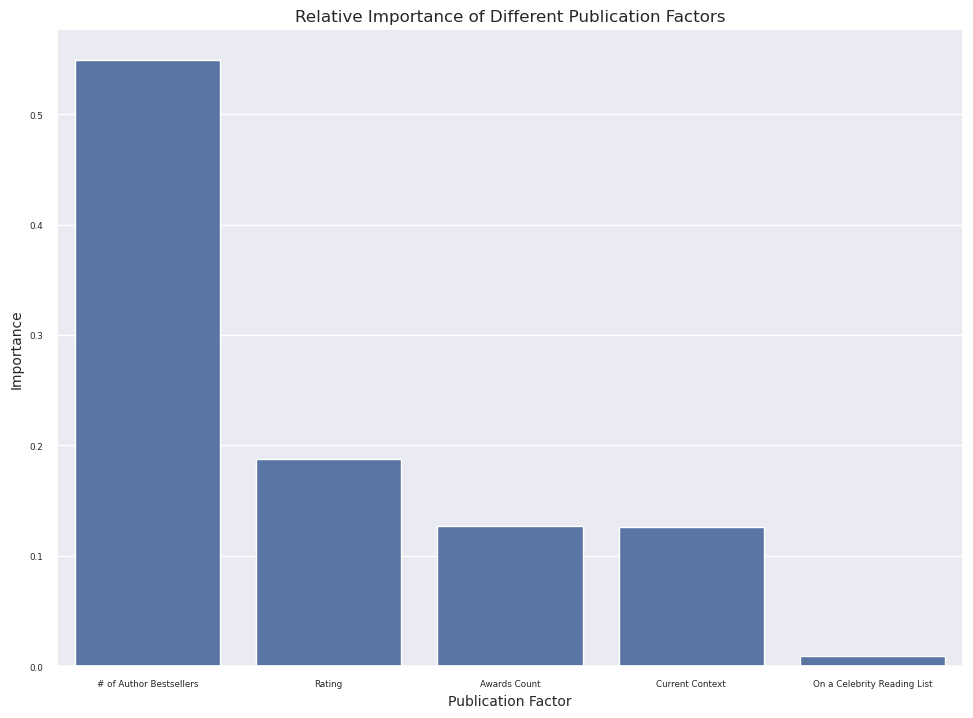

In [22]:
import seaborn as sns

sns.barplot(data=importance_df, x='Feature', y='Importance')
plt.xlabel('Publication Factor', fontdict={'size': 10})
plt.ylabel('Importance', fontdict={'size': 10})
plt.title('Relative Importance of Different Publication Factors', fontdict={'size': 12})

The Random Forest model reveals that the '# of Author Bestsellers' variable is the most important predictor of a New York Times Bestseller's average rank, given the variables we included in our model. Although the '# of Author Bestsellers' variable most significantly impacts average rank predictions, the novel's ratings, awards count, and whether the novel includes current events all seem to have a moderate amount of influence on the ranking of a New York Times Bestseller novel. However, a novel's appearance on a celebrity reading list has little to no importance in predicting its rank on the NYT Bestsellers List. According to this model, publishers should prioritize the number of previous NYT bestsellers an author has when aiming to publish novels that are likely to dominate the NYT Bestsellers List.

# Ethics & Privacy

A bias that may be present in our data is in the factors of appearance on a celebrity book club list and number of reader reviews on goodreads because other factors can influence participation in these forums. Potential factos could be age, class, level of online activity. To mitigate this potential bas we will clearly label factors that might have population bias.

Another ethical concern with our project is equitable representation of different demographic groups. Our project focuses on books in the Paperback Nonfiction genre that have reached bestseller status. An issue with this is that our analysis may intentionally favor certain authors and books with access to larger marketing campaigns. To combat this we will not generalize our findings to the overall genre of nonfiction and focus on the New York Times Bestsellers only.

Another issue that may arise is privacy concerns when collecting data from The New York Times. When web-scraping, we will ensure to follow The New York Times' terms of use and not include any user-identifiable information in our project.

We will report any potential biases in our report in order to be transparent with readers of our project. We will check for bias in our data pre-analysis, during analysis, and post-analysis by identifying any skew in the data used and highlight it in our report. Additionally, when drawing conclusions from our analysis, we will position them as correlations rather than causations in order to acknowledge the limitations of conclusions that can de drawn with our data set.


# Team Expectations 


* *Team members will communicate through Messages.*
* *Team members will communicate bluntly but politely.*
* *Major decisions will be made after discussion and must be approved by all team members. Minor decisions will be made by the individuals assigned to the certain parts of the project. If decisions need to be made in a short time frame and certain team members are unresponsive or unavailable, the remaining team members can do what they see fit.*
* *Tasks will be assigned based on the relevant skills of the team members and what tasks team members want to do. Team members are expected to be aware of progress in parts of the project that are not their own.*
* *If team members can not complete their portions of the project due to sickness, injury, or emergency, they should let the group know as soon as possible and the other team members should try their best to help complete the portion. If team members are not completing their portions without proper explanation, the group should call them out and ask them to step up.*


# Project Timeline Proposal

| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/1  |  12 PM | Think about research question and read over feedback from project proposal  | Discuss checkpoint 1, assign group members to specific parts, discuss data wrangling | 
| 11/8  |  12 PM |  Halfway progress to check point 1 | Peer review each other’s sections, Discuss Analysis Plan, Discuss data cleaning | 
| 11/15 | 12 PM  | Read over requirements for checkpoint 2  | Review/Edit wrangling/EDA; discuss feedback; Discuss Analysis Plan; discuss, visualizations, Assign group members to lead each specific part   |
| 11/27  | 12 PM  | Finish checkpoint 2, review requirements for final project | Peer review each other’s sections, discuss all feedback, Discuss Video and Final Project guidelines, complete visualizations   |
| 12/11 | 12 PM  | Finish all components of project | Final Review of Project, last minute edits, submit project |
